In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def rbf(x, mu, alpha):
    diff = np.array(x) - np.array(mu)
    if len(diff.shape) == 0:
        diff = diff.reshape(1, 1)
        alpha = np.array(alpha).reshape(1, 1)
    elif len(diff.shape) == 1:
        diff = diff.reshape(1, -1)
        alpha = np.array(alpha)
    else:
        alpha = np.array(alpha) 

    tmp = diff@alpha
    tmp2 = np.array([np.dot(tmp[i], diff[i])for i in range(diff.shape[0])])
    return np.exp(-tmp2)

In [3]:
ws = [-0.48, -0.64, 0.41, 0.28, 0.57, 0.50, -0.26, 0.60]
mus = [-4, -3, -2, -1, 0, 1, 2, 3]
f = lambda x: np.sum([w*rbf(x, mu, [1]) for w, mu in zip(ws, mus)], axis=0)

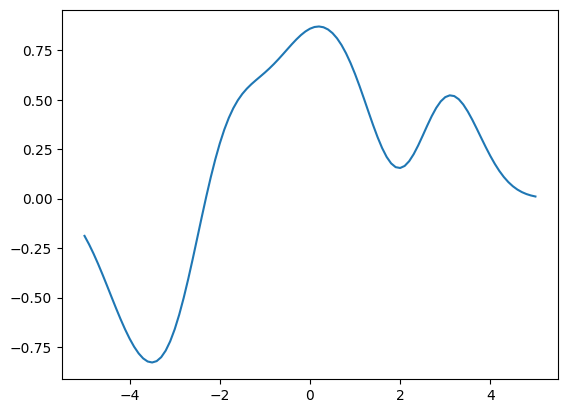

In [4]:
x = np.linspace(-5, 5, 101)
x = x.reshape(-1, 1)
y = f(x)
plt.plot(x, y)
plt.show()

In [5]:
def kernel_rbf(x1, x2, theta1=1, theta2=1):
    dx = np.array(x1 - x2)
    if len(dx.shape) == 0:
        dx = dx.reshape(1, 1)
    elif len(dx.shape) == 1:
        dx = dx.reshape(1, -1)
    
    shape = dx.shape[:-1]
    dx = dx.reshape(-1, dx.shape[-1])
    tmp = np.array([np.inner(dx[i], dx[i]) for i in range(dx.shape[0])])
    tmp = tmp.reshape(*shape)
    return theta1 * np.exp(-tmp / theta2)    


In [6]:
def kernel_linear(x1, x2):
    if len(x1.shape) == 0:
        x1 = x1.reshape(1, 1)
    elif len(x1.shape) == 1:
        x1 = x1.reshape(1, -1)
    
    shape = x1.shape[:-1]
    x1 = x1.reshape(-1, x1.shape[-1])
    x2 = x2.reshape(-1, x2.shape[-1])
    tmp = np.array([np.inner(x1[i], x2[i]) + 1 for i in range(x1.shape[0])])
    return tmp.reshape(*shape)  
    

In [7]:
def kernel_exp(x1, x2):
    dx = np.array(x1 - x2)
    if len(dx.shape) == 0:
        dx = dx.reshape(1, 1)
    elif len(dx.shape) == 1:
        dx = dx.reshape(1, -1)
    
    shape = dx.shape[:-1]
    dx = dx.reshape(-1, dx.shape[-1])
    tmp = np.array([np.linalg.norm(dx[i]) for i in range(dx.shape[0])])
    tmp = tmp.reshape(*shape)
    return np.exp(-tmp)  

In [8]:
def kernel_periodic(x1, x2):
    dx = np.array(x1 - x2)
    if len(dx.shape) == 0:
        dx = dx.reshape(1, 1)
    elif len(dx.shape) == 1:
        dx = dx.reshape(1, -1)
    
    shape = dx.shape[:-1]
    dx = dx.reshape(-1, dx.shape[-1])
    tmp = np.array([np.linalg.norm(dx[i]) for i in range(dx.shape[0])])
    tmp = tmp.reshape(*shape)
    return np.exp(np.cos(tmp/0.5))  

In [9]:
def sample_simple_gaussian_1d(x, kernel):
    x1, x2 = np.meshgrid(x, x)
    k = kernel(x1.reshape(*x1.shape, 1), x2.reshape(*x2.shape, 1))
    return np.random.multivariate_normal(np.zeros_like(x), k)

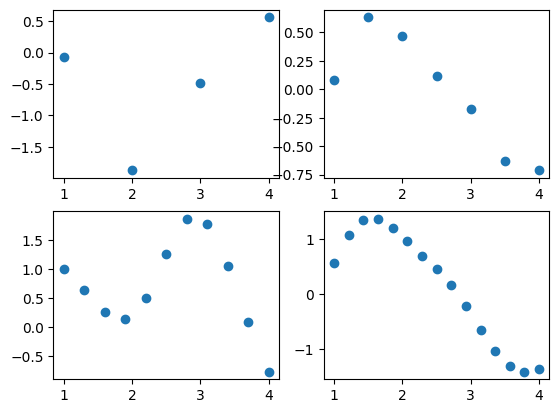

In [10]:
x1 = np.linspace(1, 4, 4)
y1 = sample_simple_gaussian_1d(x1, kernel_rbf)
x2 = np.linspace(1, 4, 7)
y2 = sample_simple_gaussian_1d(x2, kernel_rbf)
x3 = np.linspace(1, 4, 11)
y3 = sample_simple_gaussian_1d(x3, kernel_rbf)
x4 = np.linspace(1, 4, 15)
y4 = sample_simple_gaussian_1d(x4, kernel_rbf)
fig, axes = plt.subplots(2, 2)
axes[0, 0].scatter(x1, y1)
axes[0, 1].scatter(x2, y2)
axes[1, 0].scatter(x3, y3)
axes[1, 1].scatter(x4, y4)


In [11]:
def sample_simple_gaussian_2d(x):
    x1 = np.array([[x[i] for i in range(x.shape[0])] for _ in range(x.shape[0])])
    x2 = x1.transpose(1, 0, 2)
    k = kernel_rbf(x1, x2)
    return np.random.multivariate_normal(np.zeros(k.shape[0]), k)

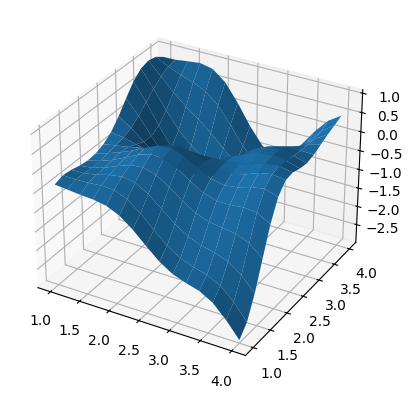

In [12]:
x = np.linspace(1, 4, 15)
x1, x2 = np.meshgrid(x, x)
x = np.concatenate([x1.reshape(*x1.shape, 1), x2.reshape(*x2.shape, 1)], axis=2)
y = sample_simple_gaussian_2d(x.reshape(-1, 2))
y = y.reshape(x.shape[0], -1)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x1, x2, y)
#x.transpose(1, 0, 2)

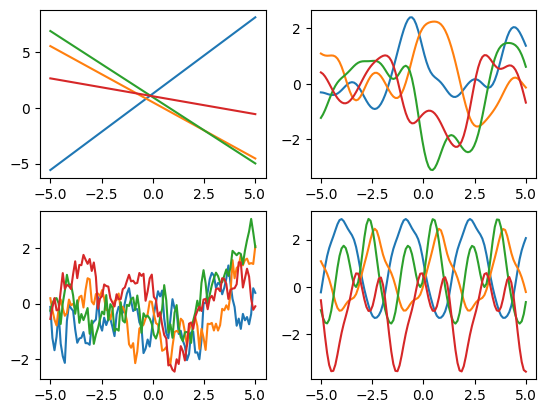

In [13]:
fig, axes = plt.subplots(2, 2)
for i in range(4):
    x1 = np.linspace(-5, 5, 100)
    y1 = sample_simple_gaussian_1d(x1, kernel_linear)
    x2 = np.linspace(-5, 5, 100)
    y2 = sample_simple_gaussian_1d(x2, kernel_rbf)
    x3 = np.linspace(-5, 5, 100)
    y3 = sample_simple_gaussian_1d(x3, kernel_exp)
    x4 = np.linspace(-5, 5, 100)
    y4 = sample_simple_gaussian_1d(x4, kernel_periodic)
    axes[0, 0].plot(x1, y1)
    axes[0, 1].plot(x2, y2)
    axes[1, 0].plot(x3, y3)
    axes[1, 1].plot(x4, y4)
# axes[1, 0].scatter(x3, y3)
# axes[1, 1].scatter(x4, y4)

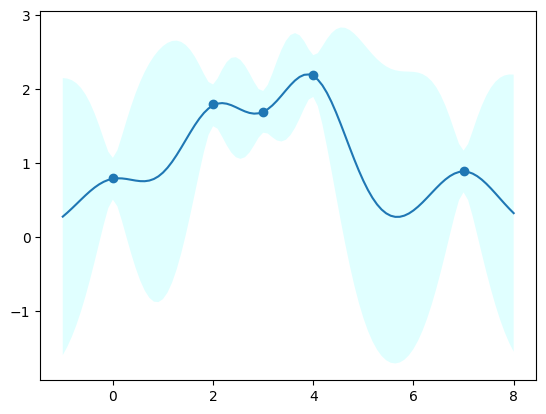

In [14]:
xtrain = [0.0, 2.0, 3.0, 4.0, 7.0]
ytrain = [0.8, 1.8, 1.7, 2.2, 0.9]
kernel = kernel_rbf
err = 0.01

x1, x2 = np.meshgrid(xtrain, xtrain)
K = kernel(x1.reshape(*x1.shape, 1), x2.reshape(*x2.shape, 1))
K = K + err * np.eye(*K.shape)
K_inv = np.linalg.inv(K)

x = np.linspace(-1, 8, 100)
x1, x2 = np.meshgrid(x, xtrain)
k = kernel(x1.reshape(*x1.shape, 1), x2.reshape(*x2.shape, 1))
x1, x2 = np.meshgrid(x, x)
kk = kernel(x1.reshape(*x1.shape, 1), x2.reshape(*x2.shape, 1))
kk += err * np.eye(*kk.shape)

mean = k.T @ K_inv @ ytrain
cov = kk - k.T @ K_inv @ k
sigma2 = 2 * np.sqrt(np.diag(cov))

plt.fill_between(x, mean - sigma2, mean + sigma2, fc="lightcyan")
plt.plot(x, mean)
plt.scatter(xtrain, ytrain)




1.0250000945221065 0.9226537574482542 1.0340539198612162 [[9.94255348]]
0.9419259010371488 0.9730830400267833 1.048595476500862 [[9.84801039]]
0.9270326855229821 0.9636237235997949 1.002494710481108 [[9.73426941]]
0.8840657933671507 0.9624412732864117 0.9454499087425847 [[9.56355363]]
0.7932648782293024 0.9821050220440971 0.9629227434392763 [[9.4977351]]
0.8035906720488457 0.9962416102065671 1.0407456070003192 [[9.6743036]]
0.8016580780627995 0.9738274463039813 1.0556950713347744 [[9.71838753]]
0.8535745282216239 1.0352915250357553 1.086707435787557 [[9.80854505]]
0.8203092366614411 0.9978365479329153 1.0510239015997371 [[9.71297494]]
0.8278052764161955 0.9663643038788973 1.0770765862114713 [[9.79637646]]
0.835905071130267 1.0140123308198483 1.013885690764439 [[9.63514435]]
0.778096383875485 1.0260536707240087 1.0603370636698508 [[9.68013003]]
0.771568546855318 1.036487991895096 1.1180929121402163 [[9.80496447]]
0.8021680313737112 1.0558883313879768 1.1080770513226876 [[9.79919014]]
0.

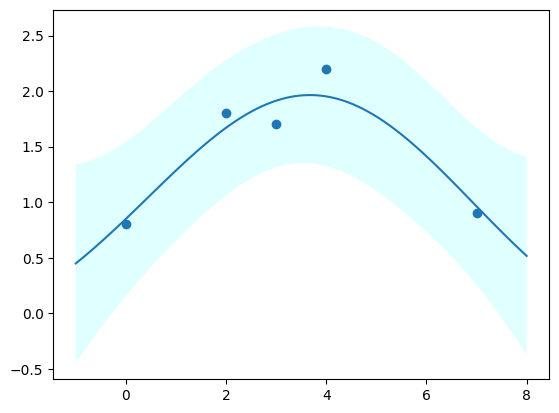

In [45]:
xtrain = np.array([[0.0, 2.0, 3.0, 4.0, 7.0]])
ytrain = np.array([[0.8, 1.8, 1.7, 2.2, 0.9]])

tau = 1
sigma = 1 
eta = 1
mcmc_range = 0.05
f_min = np.inf

x1, x2 = np.meshgrid(xtrain, xtrain)

itr = 10000
for i in range(itr):
    tau_cand = np.random.normal(tau, mcmc_range)
    sigma_cand = np.random.normal(sigma, mcmc_range)
    eta_cand = np.random.normal(eta, mcmc_range)
    theta1 = np.exp(tau)
    theta2 = np.exp(sigma)
    theta3 = np.exp(eta)
    theta1_cand = np.exp(tau_cand)
    theta2_cand = np.exp(sigma_cand)
    theta3_cand = np.exp(eta_cand)
    
    K = kernel_rbf(x1.reshape(*x1.shape, 1), x2.reshape(*x2.shape, 1), theta1, theta2)
    K = K + theta3 * np.eye(*K.shape)
    K_inv = np.linalg.inv(K)
    f = ytrain @ K_inv @ ytrain.T + np.log(np.linalg.det(K))
    K_new = kernel_rbf(x1.reshape(*x1.shape, 1), x2.reshape(*x2.shape, 1), theta1_cand, theta2_cand)
    K_new = K_new + theta3_cand * np.eye(*K_new.shape)
    K_inv_new = np.linalg.inv(K_new)
    f_new = ytrain @ K_inv_new @ ytrain.T + np.log(np.linalg.det(K_new))
    acc_prob = np.exp(f - f_new)
    if acc_prob > np.random.rand():
        tau = tau_cand
        sigma = sigma_cand
        eta = eta_cand
        if f_new < f_min:
            f_min = f_new
            tau_min = tau
            sigma_min = sigma
            eta_min = eta
        print(tau, sigma, eta, f_new)

print(tau_min, sigma_min, eta_min, f_min)

theta1 = np.exp(tau_min)
theta2 = np.exp(sigma_min)
theta3 = np.exp(eta_min)

K = kernel_rbf(x1.reshape(*x1.shape, 1), x2.reshape(*x2.shape, 1), theta1, theta2)
K = K + theta3 * np.eye(*K.shape)
K_inv = np.linalg.inv(K)

x = np.linspace(-1, 8, 100)
x1, x2 = np.meshgrid(x, xtrain)
k = kernel_rbf(x1.reshape(*x1.shape, 1), x2.reshape(*x2.shape, 1), theta1, theta2)
x1, x2 = np.meshgrid(x, x)
kk = kernel_rbf(x1.reshape(*x1.shape, 1), x2.reshape(*x2.shape, 1), theta1, theta2)
kk += theta3 * np.eye(*kk.shape)

mean = (k.T @ K_inv @ ytrain.T).flatten()
cov = kk - k.T @ K_inv @ k
sigma2 = 2 * np.sqrt(np.diag(cov))

plt.fill_between(x, mean - sigma2, mean + sigma2, fc="lightcyan")
plt.plot(x, mean)
plt.scatter(xtrain, ytrain)





In [54]:
xtrain = np.array([[0.0, 2.0, 3.0, 4.0, 7.0]])
ytrain = np.array([[0.8, 1.8, 1.7, 2.2, 0.9]])

tau = 1
sigma = 1 
eta = 1
lamda = 0.1

x1, x2 = np.meshgrid(xtrain, xtrain)

itr = 100
for i in range(itr):
    theta1 = np.exp(tau)
    theta2 = np.exp(sigma)
    theta3 = np.exp(eta)
    K = kernel_rbf(x1.reshape(*x1.shape, 1), x2.reshape(*x2.shape, 1), theta1, theta2)
    
    K_inv = np.linalg.inv(K)
    dKdtau = K[:]
    dkdsigma = K * (x1 - x2)**2 / theta2
    dkdeta = theta3 * np.eye(*K.shape)
    K = K + theta3 * np.eye(*K.shape)
    K_inv = np.linalg.inv(K)
    dldtau = -np.trace(K_inv @ dKdtau) + ytrain @ K_inv @ dKdtau @ K_inv @ ytrain.T
    dldsigma = -np.trace(K_inv @ dkdsigma) + ytrain @ K_inv @ dkdsigma @ K_inv @ ytrain.T
    dldeta = -np.trace(K_inv @ dkdeta) + ytrain @ K_inv @ dkdeta @ K_inv @ ytrain.T
    tau = tau + lamda * dldtau
    sigma = sigma + lamda * dldsigma
    eta = eta + lamda * dldeta
    print(tau, sigma, eta)

[[0.87821201]] [[1.05793086]] [[0.78149735]]
[[0.76739421]] [[1.12586342]] [[0.57689721]]
[[0.66950459]] [[1.20459489]] [[0.38454996]]
[[0.5855953]] [[1.29484088]] [[0.20262466]]
[[0.51576623]] [[1.39714777]] [[0.02909239]]
[[0.45920378]] [[1.51178705]] [[-0.13820016]]
[[0.41432592]] [[1.63862798]] [[-0.30137911]]
[[0.37903534]] [[1.77698963]] [[-0.46234744]]
[[0.35105971]] [[1.9254899]] [[-0.62259044]]
[[0.32833026]] [[2.0819257]] [[-0.78302722]]
[[0.30931968]] [[2.24321422]] [[-0.94393125]]
[[0.2932438]] [[2.40540632]] [[-1.1049046]]
[[0.28006413]] [[2.56379479]] [[-1.26487097]]
[[0.27030529]] [[2.71318065]] [[-1.42208984]]
[[0.26475605]] [[2.84836756]] [[-1.57426257]]
[[0.26411517]] [[2.96490127]] [[-1.71881023]]
[[0.26863693]] [[3.05994359]] [[-1.85331507]]
[[0.27788204]] [[3.13296666]] [[-1.97598303]]
[[0.29071058]] [[3.18585671]] [[-2.08591477]]
[[0.30555822]] [[3.22226119]] [[-2.18306732]]
[[0.32086095]] [[3.24647735]] [[-2.26799402]]
[[0.33540556]] [[3.26243437]] [[-2.34155976]

KeyboardInterrupt: 